<a href="https://colab.research.google.com/github/maronem/CDD_ML_Bioactivity_Project/blob/main/CDD_ML_bioactivity_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computational Drug Discvoery Using Bioactivity Data

The goal of this notebook and project is to build an ML model for drug discovery  using the ChEMBL database.


## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.

### Install libraries

In [1]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.19.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


### Search target and create dataframe

In [2]:
 # Import libraries

 import pandas as pd
 from chembl_webresource_client.new_client import new_client

In [3]:
# Target search for BRCA1

target = new_client.target
target_query = target.search('brca1')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,19.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Lys-63-specific deubiquitinase BRCC36,19.0,False,CHEMBL4105965,"[{'accession': 'P46736', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'BAP1', 'xref_name': None, 'xref_...",Homo sapiens,Ubiquitin carboxyl-terminal hydrolase BAP1,15.0,False,CHEMBL1293314,"[{'accession': 'Q92560', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
# Select chembl_id for BRCA1-susceptibility protein

selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL5990'

In [5]:
# Retreive bioactivity data from CHEMBL5990 (reported as IC50 values in nM)

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,6222842,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,4.6
1,None,None,6222843,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
2,None,None,6222844,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,52.8
3,None,None,6222845,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
4,None,None,6222846,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,15.0


In [7]:
df.standard_type.unique()

array(['IC50'], dtype=object)

### Save bioactivity data as csv

In [8]:
df.to_csv('CHEMBL5990_bioactivity_data.csv', index=False)

### Copying files to Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [10]:
! mkdir "/content/gdrive/MyDrive/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/Colab Notebooks/data’: File exists


In [11]:
! cp CHEMBL5990_bioactivity_data.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [12]:
!ls -l "/content/gdrive/MyDrive/Colab Notebooks/data"

total 14
-rw------- 1 root root  2442 Oct  2 20:44 bioactivity_preprocessed_data.csv
-rw------- 1 root root 10974 Oct  3 18:41 CHEMBL5990_bioactivity_data.csv


# Preprocessing Data

In [13]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,6222842,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,4.6
1,None,None,6222843,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
2,None,None,6222844,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,52.8
3,None,None,6222845,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
4,None,None,6222846,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,15.0
5,None,None,6222847,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,35.0
6,None,None,6222848,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,3.2
7,None,None,6222849,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,30.1
8,None,None,6222850,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,7.1
9,None,None,6222851,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,18.4


In [14]:
df.standard_value.notna()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
Name: standard_value, dtype: bool

No missing IC50 values for this dataset

## Labeling compounds as being active, inactive, or intermediate

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [15]:
bioactivity_class = []

for value in df.standard_value:
  if float(value) >= 10000:
    bioactivity_class.append("inactive")
  elif float(value) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [16]:
bioactivity_class

['intermediate',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'intermediate',
 'inactive',
 'intermediate',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'intermediate']

In [17]:
len(df.molecule_chembl_id.unique()) == len(df.molecule_chembl_id)

True

No repeat chembl_id's in our dataset

In [18]:
# Iterate the chembl_id's to a list

mol_cid = []

for id in df.molecule_chembl_id:
  mol_cid.append(id)

In [19]:
# Iterate canonical smiles to list

canon_smiles = []

for i in df.canonical_smiles:
  canon_smiles.append(i)

In [20]:
# Iterate standard values to a list

std_value = []

for value in df.standard_value:
  std_value.append(value)

In [64]:
# Combine the four data lists into a dataframe

bioactivity_df = pd.DataFrame(list(zip(mol_cid, bioactivity_class, canon_smiles, std_value)),
                              columns=['molecular_cID', 'bioactivity_class', 'canonical_smiles', 'standard_value'])
bioactivity_df

,molecular_cID,bioactivity_class,canonical_smiles,standard_value
0,CHEMBL1784774,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600.0
1,CHEMBL1784771,inactive,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000.0
2,CHEMBL1784772,inactive,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800.0
3,CHEMBL1784773,inactive,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000.0
4,CHEMBL1784704,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000.0
5,CHEMBL1784770,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,35000.0
6,CHEMBL1784703,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,3200.0
7,CHEMBL1784775,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,30100.0
8,CHEMBL1784776,intermediate,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,7100.0
9,CHEMBL1784777,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,18400.0


### Save bioactivity data df to csv

In [65]:
bioactivity_df.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [66]:
!ls -l

total 83092
-rw-r--r-- 1 root root     2442 Oct  3 20:00 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root    10974 Oct  3 18:41 CHEMBL5990_bioactivity_data.csv
drwx------ 5 root root     4096 Oct  3 18:41 gdrive
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
drwxr-xr-x 1 root root     4096 Oct  2 13:21 sample_data


In [67]:
#copy/paste csv to data folder

!cp bioactivity_preprocessed_data.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [68]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/data"

bioactivity_preprocessed_data.csv  CHEMBL5990_bioactivity_data.csv


# **Exploratory Data Analysis**

## Install conda and rdkit

RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python.

In [26]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-10-03 18:41:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   140MB/s    in 0.6s    

2023-10-03 18:41:27 (140 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## Calculate Lipinski descriptors

Lipinski's rule of five, also known as Pfizer's rule of five or simply the rule of five (RO5), is a rule of thumb to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would likely make it an orally active drug in humans.

The rule was formulated by Christopher A. Lipinski, based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules. - https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#:~:text=Lipinski's%20rule%20states%20that%2C%20in,all%20nitrogen%20or%20oxygen%20atoms

Lipinski's rule states that, in general, an orally active drug has no more than one violation of the following criteria:

* No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
* No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
* A molecular mass less than 500 daltons
* A calculated octanol-water partition coefficient (Clog P) < 5



In [27]:
bioactivity_df.head()

,Molecular cID,Bioactivity Class,Canonical Smiles,Standard Value
0,CHEMBL1784774,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600.0
1,CHEMBL1784771,inactive,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000.0
2,CHEMBL1784772,inactive,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800.0
3,CHEMBL1784773,inactive,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000.0
4,CHEMBL1784704,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000.0


### Import Libraries

In [28]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.2 MB/s 


In [29]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

rdkit.__version__

'2023.03.2'

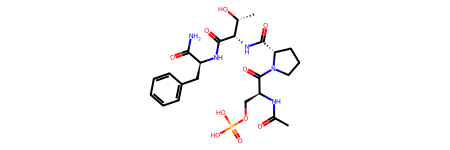

In [69]:
a = Chem.MolFromSmiles(bioactivity_df.canonical_smiles[0])
a

In [31]:
Descriptors.MolWt(a)

571.5240000000002

### Function to calc descriptors of interest

In [51]:
def lipinskiDesc(smiles, verbose=False):

  # Create a list of mol's from smile data
  moldata = []
  for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i=0

  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHAcceptors,
                    desc_NumHAcceptors])

    if i == 0:
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors_df = pd.DataFrame(baseData, columns=columnNames)

  return descriptors_df

In [70]:
descriptors_df = lipinskiDesc(bioactivity_df.canonical_smiles)

In [71]:
descriptors_df

,MW,LogP,NumHDonors,NumHAcceptors
0,571.524,-2.3302,8.0,8.0
1,533.582,-1.5747,7.0,7.0
2,577.591,-2.2640,8.0,8.0
3,585.551,-1.9417,8.0,8.0
4,545.486,-2.8165,8.0,8.0
5,541.498,-1.6911,7.0,7.0
6,569.552,-1.0550,7.0,7.0
7,557.497,-2.7187,8.0,8.0
8,583.579,-0.6649,7.0,7.0
9,583.579,-0.6649,7.0,7.0


In [72]:
# Concat bioactivity_df and descriptors_df

bioac_desc_df = pd.concat([bioactivity_df, descriptors_df], axis =1)
bioac_desc_df

,molecular_cID,bioactivity_class,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1784774,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600.0,571.524,-2.3302,8.0,8.0
1,CHEMBL1784771,inactive,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000.0,533.582,-1.5747,7.0,7.0
2,CHEMBL1784772,inactive,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800.0,577.591,-2.2640,8.0,8.0
3,CHEMBL1784773,inactive,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000.0,585.551,-1.9417,8.0,8.0
4,CHEMBL1784704,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000.0,545.486,-2.8165,8.0,8.0
5,CHEMBL1784770,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,35000.0,541.498,-1.6911,7.0,7.0
6,CHEMBL1784703,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,3200.0,569.552,-1.0550,7.0,7.0
7,CHEMBL1784775,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,30100.0,557.497,-2.7187,8.0,8.0
8,CHEMBL1784776,intermediate,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,7100.0,583.579,-0.6649,7.0,7.0
9,CHEMBL1784777,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,18400.0,583.579,-0.6649,7.0,7.0


### Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we are converting IC50 to -log scale `(-log10(IC50))`

(array([5., 1., 2., 1., 2., 1., 2., 1., 2., 2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

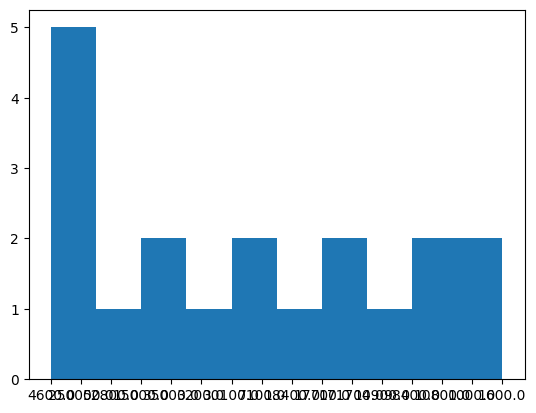

In [77]:
import matplotlib.pyplot as plt

plt.hist(bioac_desc_df.standard_value)

In [113]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)

    return x

In [102]:
bioac_desc_df.dtypes

molecular_cID         object
bioactivity_class     object
canonical_smiles      object
standard_value       float64
MW                   float64
LogP                 float64
NumHDonors           float64
NumHAcceptors        float64
dtype: object

In [103]:
bioac_desc_df['standard_value'] = bioac_desc_df['standard_value'].astype(float)

In [104]:
bioac_desc_df.dtypes

molecular_cID         object
bioactivity_class     object
canonical_smiles      object
standard_value       float64
MW                   float64
LogP                 float64
NumHDonors           float64
NumHAcceptors        float64
dtype: object

In [105]:
bioac_desc_df.standard_value.describe()

count        19.000000
mean      78015.789474
std       99927.853214
min        1000.000000
25%        8950.000000
50%       18400.000000
75%      135050.000000
max      250000.000000
Name: standard_value, dtype: float64

In [114]:
df_final = pIC50(bioac_desc_df)
df_final

<ipython-input-113-0d893179f063>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecular_cID,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1784774,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,571.524,-2.3302,8.0,8.0,5.337242
1,CHEMBL1784771,inactive,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,533.582,-1.5747,7.0,7.0,3.602060
2,CHEMBL1784772,inactive,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,577.591,-2.2640,8.0,8.0,4.277366
3,CHEMBL1784773,inactive,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,585.551,-1.9417,8.0,8.0,3.602060
4,CHEMBL1784704,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,545.486,-2.8165,8.0,8.0,4.823909
5,CHEMBL1784770,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,541.498,-1.6911,7.0,7.0,4.455932
6,CHEMBL1784703,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,569.552,-1.0550,7.0,7.0,5.494850
7,CHEMBL1784775,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,557.497,-2.7187,8.0,8.0,4.521434
8,CHEMBL1784776,intermediate,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,583.579,-0.6649,7.0,7.0,5.148742
9,CHEMBL1784777,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,583.579,-0.6649,7.0,7.0,4.735182


(array([5., 1., 1., 2., 2., 3., 1., 2., 0., 2.]),
 array([3.60205999, 3.84185399, 4.08164799, 4.32144199, 4.56123599,
        4.80103   , 5.040824  , 5.280618  , 5.520412  , 5.760206  ,
        6.        ]),
 <BarContainer object of 10 artists>)

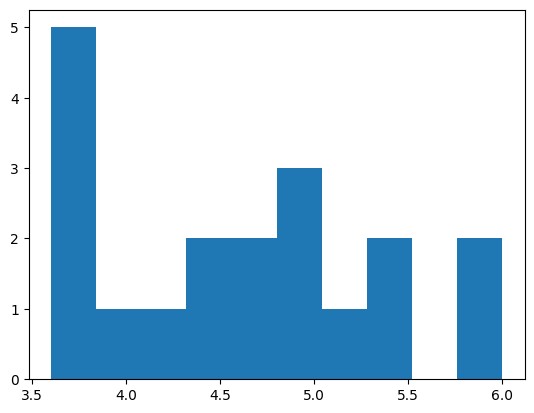

In [117]:
plt.hist(df_final.pIC50)

In [119]:
df_final.pIC50.describe()

count    19.000000
mean      4.595601
std       0.762873
min       3.602060
25%       3.886117
50%       4.735182
75%       5.057659
max       6.000000
Name: pIC50, dtype: float64

### Remove Intermediate activity class

This will allow for direct comparison of active and inactive

In [126]:
df_2classes = df_final[df_final.bioactivity_class != "intermediate"]
df_2classes

,molecular_cID,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL1784771,inactive,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,533.582,-1.5747,7.0,7.0,3.602060
2,CHEMBL1784772,inactive,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,577.591,-2.2640,8.0,8.0,4.277366
3,CHEMBL1784773,inactive,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,585.551,-1.9417,8.0,8.0,3.602060
4,CHEMBL1784704,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,545.486,-2.8165,8.0,8.0,4.823909
5,CHEMBL1784770,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,541.498,-1.6911,7.0,7.0,4.455932
7,CHEMBL1784775,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,557.497,-2.7187,8.0,8.0,4.521434
9,CHEMBL1784777,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,583.579,-0.6649,7.0,7.0,4.735182
10,CHEMBL2369531,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,621.584,-1.1770,8.0,8.0,4.752027
11,CHEMBL2369532,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,621.584,-1.1770,8.0,8.0,3.765230
12,CHEMBL1784779,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,587.523,-2.6246,9.0,9.0,4.826814


In [128]:
df_2classes.bioactivity_class.unique()

array(['inactive', 'active'], dtype=object)

### Frequency Plot of bioactivity classes

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

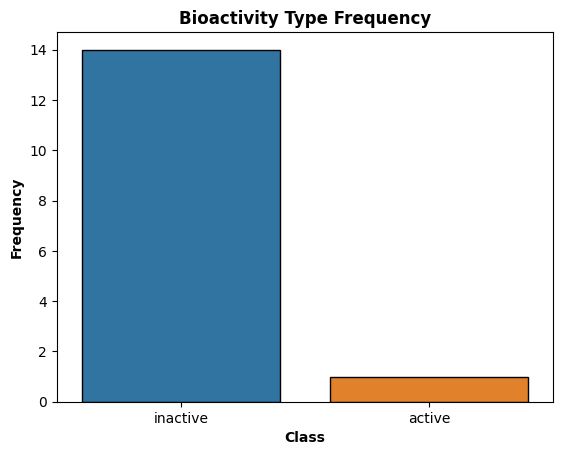

In [137]:
sns.countplot(data=df_2classes, x='bioactivity_class', edgecolor='black')
plt.title("Bioactivity Type Frequency", fontweight='bold')
plt.xlabel("Class", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.show();

### Scatterplot of MW vs logP(solutiblity)

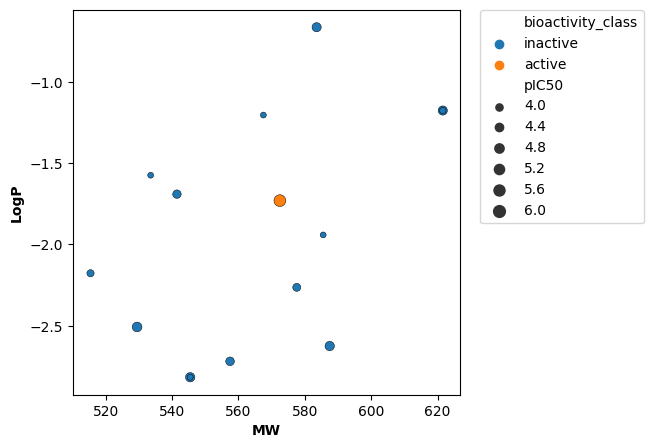

In [148]:
plt.figure(figsize=(5,5))

sns.scatterplot(data=df_2classes, x='MW', y='LogP', hue='bioactivity_class', size='pIC50', edgecolor='black')
plt.xlabel('MW', fontweight='bold')
plt.ylabel('LogP', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show();

### Comparison of pIC50 values between bioactivity status

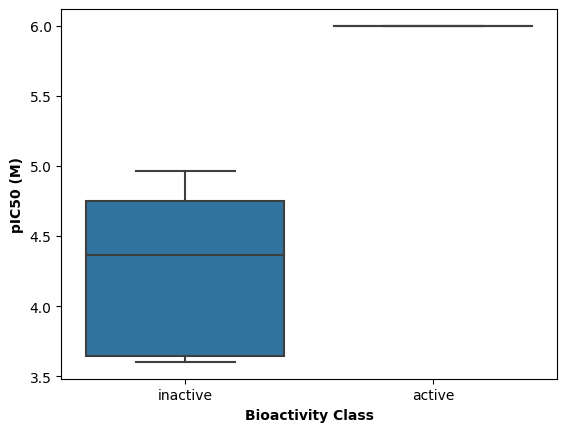

In [151]:
sns.boxplot(data=df_2classes, x='bioactivity_class', y='pIC50')
plt.xlabel('Bioactivity Class', fontweight='bold')
plt.ylabel('pIC50 (M)', fontweight='bold')
plt.show();